In [1]:
import os

from PIL import Image
from pyproj import Proj, transform
import numpy as np

import matplotlib.pyplot as plt
import numpy as np
import rioxarray as rxr
import geopandas as gpd
import earthpy as et
import earthpy.plot as ep
import earthpy.spatial as es

plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['axes.titlesize'] = 20


 Each sensor collected 11 image bands.

                PanF27A,PanF02A and PanB14A panchromatic bands with a

                spectral range of 465-676nm. RedN00a and RedB16a with a

                spectral range of 604-664nm. GrnN00a and GrnB16a with a

                spectral range of 533-587nm. BluN00a and BluB16a with a

                spectral range of 420-492nm and Near-infrared bands

                NirN00a and NirB16a with a spectral range of 833-920nm.

                The CCD arrays have a pixel size of 6.5 microns in a

                12000x1 format.

In [2]:
##Load the NAIP file 

os.chdir(os.path.join(et.io.HOME, 'earth-analytics', 'data'))

naip_csf_path = os.path.join("fresno-data", 
                             "m_3611910_se_11_060_20220620", 
                             "m_3611910_se_11_060_20220620.tif")


ouput_file_path = os.path.join("fresno-data", 
                             "m_3611910_se_11_060_20220620", 
                             "full_mask_fifthband.tif")


polygon_image = os.path.join("SolarPanel_Aug252010_4812BirminghamWay.tif")



naip_csf = rxr.open_rasterio(polygon_image, masked=True)
naip_csf

<xarray.DataArray (band: 4, y: 21, x: 19)>
array([[[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[ 0.,  0., ...,  0.,  0.],
        [ 0.,  0., ...,  0.,  0.],
        ...,
        [ 0.,  0., ...,  0.,  0.],
        [ 0.,  0., ...,  0.,  0.]]], dtype=float32)
Coordinates:
  * band         (band) int64 1 2 3 4
  * x            (x) float64 6.496e+05 6.496e+05 ... 6.496e+05 6.496e+05
  * y            (y) float64 4.207e+06 4.207e+06 ... 4.207e+06 4.207e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

In [24]:
naip_csf.shape

(4, 68, 54)

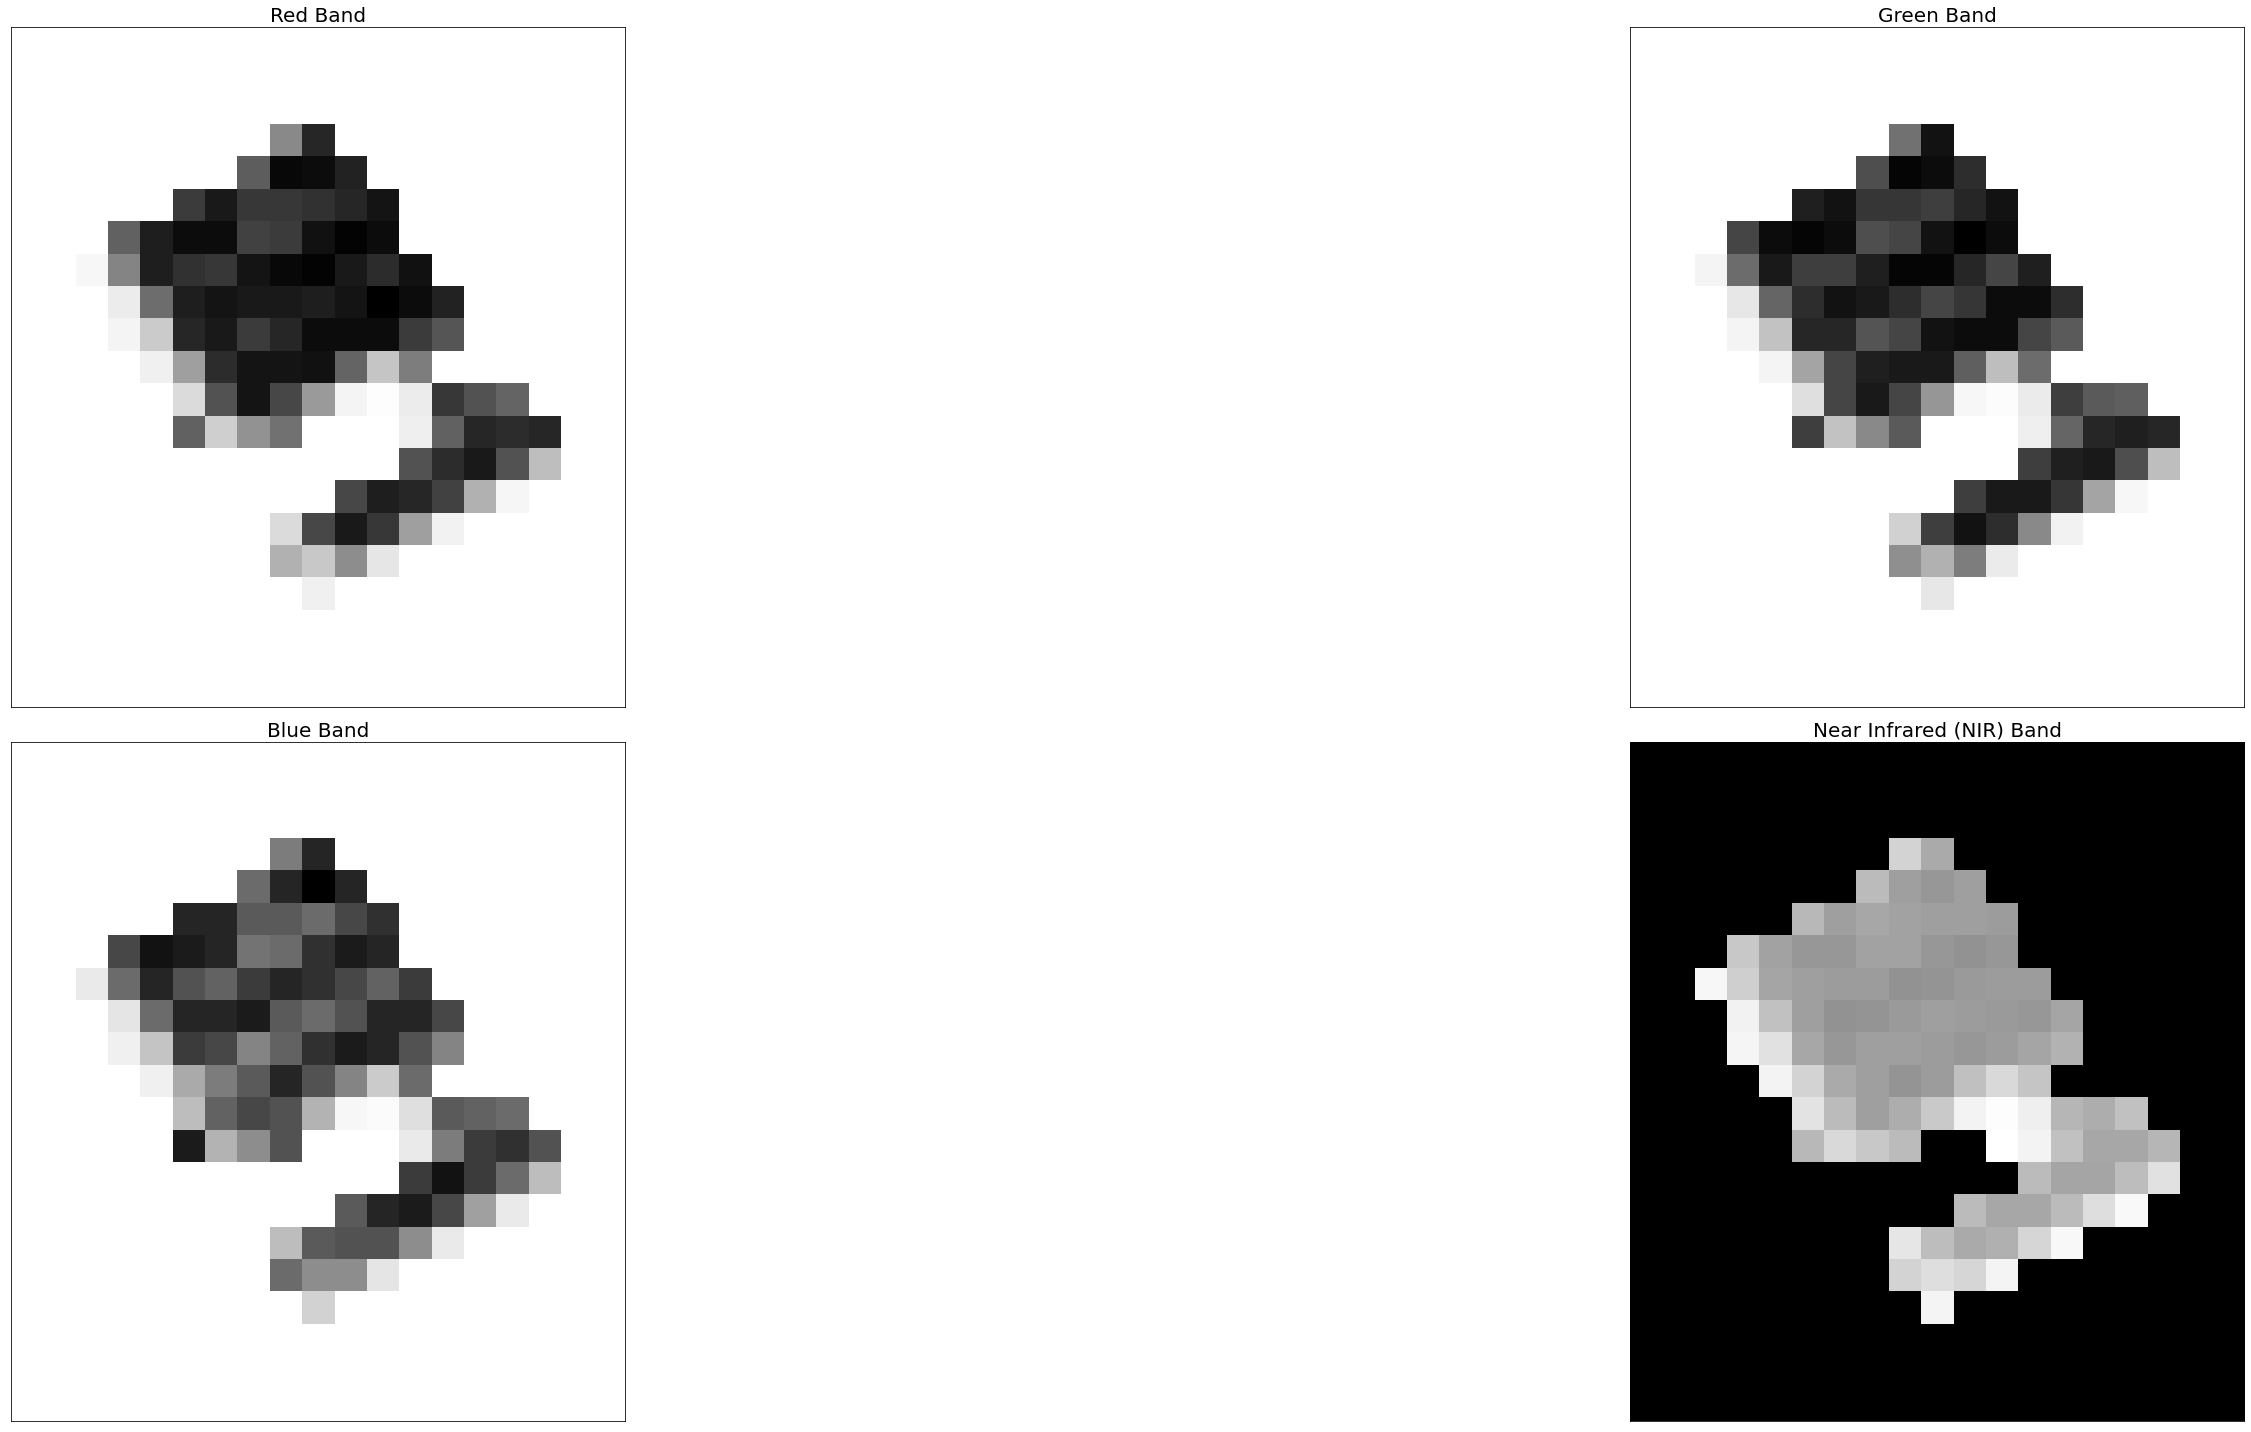

In [3]:
titles = ["Red Band", "Green Band", "Blue Band", "Near Infrared (NIR) Band"]
# titles = ["Red Band", "Green Band", "Blue Band", "Near Infrared (NIR) Band", "Mask"]

# Plot all bands using the earthpy function
ep.plot_bands(naip_csf, 
              figsize=(60, 20), 
              cols=2,
              title=titles,
              cbar=False)
plt.show()

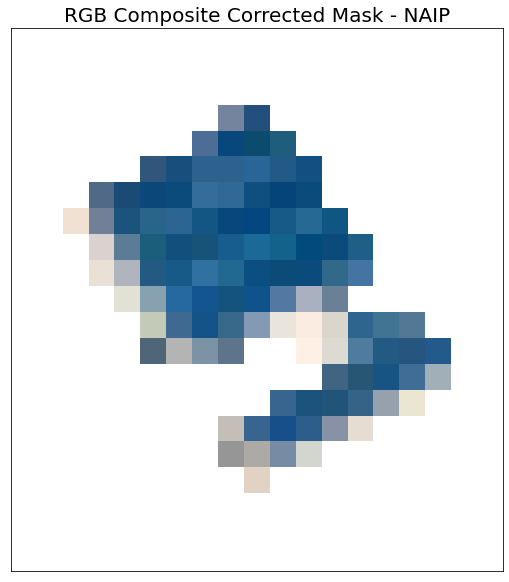

In [4]:
ep.plot_rgb(naip_csf.values,
            rgb=[0, 1, 2],
            title="RGB Composite Corrected Mask - NAIP")

plt.show()


In [30]:
##This converts the fifth boolean band into a mask

def tiff_mask_to_png(tiff_data, band_index, output_path):
    # Read the TIFF file using rioxarray
    tiff_data = rxr.open_rasterio(tiff_path)
    
    # Get the specified band as a DataArray
    band_array = tiff_data.sel(band=band_index)
    
    # Convert binary band values to 8-bit grayscale (0 for black, 255 for white)
    grayscale_array = np.where(band_array == 0, 0, 255).astype(np.uint8)
    
    # Create a PIL Image from the numpy array
    image = Image.fromarray(grayscale_array, mode='L')
    
    # Save the image as PNG
    image.save(output_path)
    
    print(f"PNG file saved at: {output_path}")

# Example usage
tiff_path = ouput_file_path
band_index = 5
output_path = "mask.png"

tiff_mask_to_png(tiff_path, band_index, output_path)

PNG file saved at: mask.png


In [49]:
##Export IR band in red band

# Open the GeoTIFF file
tiff_path = ouput_file_path
tiff_data = rasterio.open(tiff_path)

# Read the first three bands
band_indices = [4,2,3]  # Indices of the desired bands
selected_bands = tiff_data.read(band_indices)

# # Rescale the pixel values to 0-255 range
# min_value = selected_bands.min()
# max_value = selected_bands.max()
# scaled_bands = 255 * (selected_bands - min_value) / (max_value - min_value)

# Convert the bands to 8-bit unsigned integer
scaled_bands = selected_bands.astype('uint8')

# Merge the bands into an RGB image
rgb_image = np.dstack((scaled_bands[0], scaled_bands[1], scaled_bands[2]))

# Create a PIL Image from the numpy array
image = Image.fromarray(rgb_image)

# Define the output PNG file path
png_path = 'IRGBoutput.png'

# Save the image as PNG
image.save(png_path)

# Close the GeoTIFF file
tiff_data.close()

In [ ]:
##Export regular red band

# Open the GeoTIFF file
tiff_path = ouput_file_path
tiff_data = rasterio.open(tiff_path)

# Read the first three bands
band_indices = [1,2,3]  # Indices of the desired bands
selected_bands = tiff_data.read(band_indices)

# # Rescale the pixel values to 0-255 range
# min_value = selected_bands.min()
# max_value = selected_bands.max()
# scaled_bands = 255 * (selected_bands - min_value) / (max_value - min_value)

# Convert the bands to 8-bit unsigned integer
scaled_bands = selected_bands.astype('uint8')

# Merge the bands into an RGB image
rgb_image = np.dstack((scaled_bands[0], scaled_bands[1], scaled_bands[2]))

# Create a PIL Image from the numpy array
image = Image.fromarray(rgb_image)

# Define the output PNG file path
png_path = 'IRGBoutput.png'

# Save the image as PNG
image.save(png_path)

# Close the GeoTIFF file
tiff_data.close()